Read .nc files

In [6]:
import xarray as xr

# Open the NetCDF file
file_path = r"E:\IPMA\SPEIbase_v2-10\SPEI01\spei01.nc"
ds = xr.open_dataset(file_path)

# Display the dataset's structure and metadata
print("Dataset Overview:\n")
print(ds)

# List all variables in the dataset
print("\nAvailable Variables:")
for var in ds.variables:
    print(f"- {var}: {ds[var].dims}, {ds[var].shape}")


Dataset Overview:

<xarray.Dataset> Size: 2GB
Dimensions:  (lon: 720, lat: 360, time: 1476)
Coordinates:
  * lon      (lon) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2023-12-16
Data variables:
    spei     (time, lat, lon) float32 2GB ...
    crs      int32 4B ...
Attributes: (12/15)
    conventions:  CF-1.11
    title:        Global 1-month SPEI, z-values, 0.5 degree
    version:      2.10.0
    id:           ./outputNcdf/spei01.nc
    summary:      Global dataset of the Standardized Precipitation-Evapotrans...
    keywords:     drought, climatology, SPEI, Standardized Precipitation-Evap...
    ...           ...
    software:     Created in R using the SPEI package (https://cran.r-project...
    call:         spei.nc(sca=i, inPre=./inputData/cru_ts4.08.1901.2023.pre.d...
    date:         Wed Jul 10 08:40:41 2024
    ref

Read .mat files

In [ ]:
from scipy.io import loadmat

data = loadmat(r"E:\IPMA\FRP\MODIS_2001.mat", struct_as_record=False, squeeze_me=True)

dados = data["dados"]  # Extract variable

print("Type of 'dados':", type(dados))

if hasattr(dados, "_fieldnames"):  # Check if it's a struct
    print("Struct fields:", dados._fieldnames)
    for field in dados._fieldnames:
        print(f"Field '{field}':", getattr(dados, field))

View on map

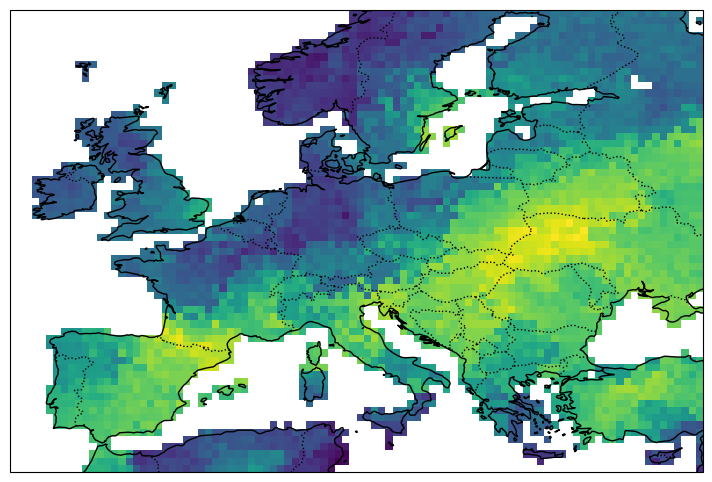

In [7]:
# View map with nc file

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your NetCDF file (change the path accordingly)
file_path = r"E:\IPMA\SPEIbase_v2-10\SPEI01\2cropped_1979_2023\spei01_1979.nc"
ds = xr.open_dataset(file_path)

# Extract the data you want to plot (for example, pm10)
pm10_data = ds['spei'].isel(time=0)  # Select the first time step (change if needed)

# Extract longitude and latitude values
lon = ds['lon'].values
lat = ds['lat'].values

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the map: add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the data (you can adjust the colormap and other settings)
c = ax.pcolormesh(lon, lat, pm10_data, cmap='viridis', shading='auto', transform=ccrs.PlateCarree())

# Show the plot
plt.show()

# Close the dataset after processing
ds.close()


View .nc file on table

In [4]:
import xarray as xr
import pandas as pd

# Open the NetCDF file
nc_file = r"E:\IPMA\SPEIbase_v2-10\SPEI01\1raw_1979_2023\spei01_1979.nc"
ds = xr.open_dataset(nc_file)

# Convert all variables to a DataFrame
df = ds.to_dataframe().reset_index()

# Display the first few rows
print(df.head())


      lon    lat       time  spei         crs
0 -179.75 -89.75 1979-01-16   NaN -2147483647
1 -179.75 -89.75 1979-02-15   NaN -2147483647
2 -179.75 -89.75 1979-03-16   NaN -2147483647
3 -179.75 -89.75 1979-04-16   NaN -2147483647
4 -179.75 -89.75 1979-05-16   NaN -2147483647


View .csv file on table

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"E:\IPMA\FRP\FRP_2001_2023.csv"

# Load CSV into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify data loading
print(df.head())

In [ ]:
# View map with csv file

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv(r"E:\IPMA\FRP\FRP_2001_2023.csv")

# Convert "acq_date" to datetime format and extract year & month
df["acq_date"] = pd.to_datetime(df["acq_date"])
df["year"] = df["acq_date"].dt.year
df["month"] = df["acq_date"].dt.month  # Extract month as integer (1-12)

# Select the year (required) and month (optional)
selected_year = 2020  # Change to desired year (2001-2023)
selected_month = 7  # Set to None to include all months OR set a value (1-12)

# Filter the dataset
if selected_month is not None:
    df = df[(df["year"] == selected_year) & (df["month"] == selected_month)]
else:
    df = df[df["year"] == selected_year]  # Only filter by year

# Convert to GeoDataFrame if data exists
if not df.empty:
    geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

    # Plot the filtered points
    fig, ax = plt.subplots(figsize=(8, 6))
    gdf.plot(ax=ax, color="blue", markersize=10, alpha=0.5)

    title = f"Mapped Locations for {selected_year}"
    if selected_month is not None:
        title += f"-{selected_month:02d}"  # Format as YYYY-MM

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)

    plt.show()
else:
    no_data_msg = f"No data available for {selected_year}"
    if selected_month is not None:
        no_data_msg += f"-{selected_month:02d}"
    print(no_data_msg)



View npy file

In [ ]:
import numpy as np

# Load the .npy file
file_path = r"E:\IPMA\SPEI\SPEI3\SPEI3_1979.npy"
data = np.load(file_path)

# Print structure details
print("Shape:", data.shape)
print("Data type:", data.dtype)
print("Preview (first slice):\n", data[0])  # Print first "layer" of the 3D array
